## Getting Chat Generated Articles from OpenAI

In [37]:
#%pip install openai

In [38]:
import openai
import pandas as pd
import numpy as np
import time

# Set api key here, left empty for account privacy reasons. You can add you own api key if you want to try
openai.api_key = ""

In [39]:
# with open("C:\\Users\\graduate\\Box\\Courses taken\\CS 6830 Data Science in practice\\Final project\\openai_api.txt", 'r') as f:
#     api_key = f.read().strip()

# # Set api key here, left empty for account privacy reasons. You can add you own api key if you want to try
# openai.api_key = api_key

In [40]:
# articles is a list of dictionaries. Each dictionary contains all the information needed to generate one news article.
# Information is gotten by scraping existing articles online
# Currently, the prompt requires the the new organization: 'source', wordcount the generated article should be: 'wordcount'
# and the headline: 'headline'. An example is shown below
articles = [{'source':'CNN', 'wordcount':'200', 'headline':'What is the Good Friday Agreement? How a historic deal ended the Troubles in Northern Ireland'}]

In [41]:
def getFakeArticles(articles):
    fakeArticles = pd.DataFrame(columns=['Headline', 'Content'])
    for article in articles:
        prompt=[
            {"role": "system", "content": f"You are a journalist at {article['source']}"},
            {"role": "user", "content": f"Write an article with about {article['wordcount']} words with the headline '{article['headline']}'"},
        ]
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=prompt
        )
        fakeArticles.loc[len(fakeArticles.index)] = [article['headline'], response['choices'][0]['message']['content']]
        print(f'Articles created: {len(fakeArticles)}')

        time.sleep(5)

    return fakeArticles

## Make CNN Fake Articles

In [42]:
# df = pd.read_csv('CNN500_items.csv')

# ai_50 = df.sample(frac = 0.5)
# real_50 = df.drop(ai_50.index)

# articles = []
# for index, row in ai_50.iterrows():
#     articles.append({'source':'CNN','wordcount':len(row.Description.replace('\n','').split(' ')),'headline':row.Title.replace('\n','').strip()})

In [43]:
# ai_gen = getFakeArticles(articles)

In [44]:
# ai_gen.columns = ['Title', 'Content']
# ai_gen['Source'] = 1

# non_ai = real_50[['Title', 'Description']]
# non_ai.columns = ['Title', 'Content']
# non_ai['Source'] = 0

# cnn_mixed = pd.concat([ai_gen, non_ai], ignore_index=True)

In [45]:
# cnn_mixed.to_csv(path_or_buf="cnn_mixed.csv")

## Make AP Fake Articles

In [46]:
# df = pd.read_csv('AP501dataset.csv')

# df.loc[0].text
# ai_50 = df.sample(frac = 0.5)
# real_50 = df.drop(ai_50.index)

# articles = []
# for index, row in ai_50.iterrows():
#     articles.append({'source':'AP News','wordcount':len(row.text.replace('\n','').split(' ')),'headline':row.title.replace('\n','').strip()})

In [47]:
# ai_gen = getFakeArticles(articles)

In [48]:
# ai_gen.columns = ['Title', 'Content']
# ai_gen['Source'] = 1

# non_ai = real_50[['title', 'text']]
# non_ai.columns = ['Title', 'Content']
# non_ai['Source'] = 0

# ap_mixed = pd.concat([ai_gen, non_ai], ignore_index=True)

In [49]:
# ap_mixed.to_csv("ap_mixed.csv")

## Make Fake Fox News Articles

In [50]:
# df = pd.read_csv('fox260.csv')

# ai_50 = df.sample(frac = 0.5)
# real_50 = df.drop(ai_50.index)

# articles = []
# for index, row in ai_50.iterrows():
#     articles.append({'source':'Fox News','wordcount':len(row.text.replace('\n','').split(' ')),'headline':row.title.replace('\n','').strip()})

In [51]:
# ai_gen = getFakeArticles(articles)

In [52]:
# ai_gen.columns = ['Title', 'Content']
# ai_gen['Source'] = 1

# non_ai = real_50[['title', 'text']]
# non_ai.columns = ['Title', 'Content']
# non_ai['Source'] = 0

# fox_mixed = pd.concat([ai_gen, non_ai], ignore_index=True)

In [53]:
# fox_mixed.to_csv("fox_mixed.csv")

## Megh's Analysis

#### Read dataset

In [54]:
import pandas as pd
import numpy as np

In [55]:
# Read the three CSV files into separate DataFrames
ap_mixed1 = pd.read_csv('ap_mixed.csv')
display(ap_mixed1)

,Unnamed: 0,Title,Content,Source
0,0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1
1,1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1
2,2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1
3,3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1
4,4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1
...,...,...,...,...
496,496,When exactly will India surpass China as most ...,India will surpass China’s population this mon...,0
497,497,"India residents try to save a river, officials...","KOCHI, India (AP) — Eloor smells like it is dy...",0
498,498,Dutch court nixes plan to reduce flights at Sc...,"THE HAGUE, Netherlands (AP) — A judge ruled We...",0
499,499,Easter marks Las Vegas' warmest day yet in 2023,LAS VEGAS (AP) — Easter Sunday marks the first...,0


In [56]:
cnn_mixed1 = pd.read_csv('cnn_mixed.csv')
display(cnn_mixed1)

,Unnamed: 0,Title,Content,Source
0,0,FBI warns consumers not to use public phone ch...,Security experts have been warning about the d...,1
1,1,'Flabbergasted': See doctor's reaction to judg...,A recent controversial ruling by a judge has l...,1
2,2,Nashville sends Justin Jones back to the Tenne...,Nashville sends Justin Jones back to the Tenne...,1
3,3,A coffee chain announced it wants to make your...,In a move aimed at catering to the growing dem...,1
4,4,WWE apologizes for using footage of Auschwitz ...,In a move that shocked and angered fans across...,1
...,...,...,...,...
494,494,\n Emmy Rossum announces ...,\n In a surprise announce...,0
495,495,\n Michael K. Williams: M...,\n A Brooklyn man charged...,0
496,496,\n April movie preview\n ...,\n Nicolas Cage as Count ...,0
497,497,"\n Damon, Davis, Affleck ...",\n Ben Affleck directs hi...,0


In [57]:
fox_mixed1 = pd.read_csv('fox_mixed.csv')
display(fox_mixed1)

,Unnamed: 0,Title,Content,Source
0,0,Gisele Bündchen shares message about regrowth ...,Supermodel Gisele Bündchen has shared an empow...,1
1,1,Recession 'appears inevitable' and may have al...,Economic experts are sounding the alarm that a...,1
2,2,Snapchat AI chatbot allegedly gave advice to 1...,A highly concerning story has emerged that a S...,1
3,3,Britain to give cigarette smokers vapes in wor...,The UK government has announced a groundbreaki...,1
4,4,Cyprus probing residents involved in alleged R...,Cyprus has been investigating individuals and ...,1
...,...,...,...,...
384,384,"AOC, other pro-choicers want to ignore court r...","Alexandria Ocasio-Cortez, a heroine on the Lef...",0
385,385,IMF trims global growth outlook as banking tur...,The International Monetary Fund on Tuesday cut...,0
386,386,Drake Bell is 'safe' after former Nickelodeon ...,"Former Nickelodeon actor Drake Bell, is no lon...",0
387,387,Mark Wahlberg’s daughter hilariously impersona...,Mark Wahlberg isn’t the only member of his fam...,0


#### merging 3 datasets into one

In [58]:
# Concatenate the three DataFrames vertically (row-wise)
dataset = pd.concat([ap_mixed1, cnn_mixed1, fox_mixed1], ignore_index=True).reset_index()
dataset[750:1000]

,index,Unnamed: 0,Title,Content,Source
750,750,249,Owen Wilson channels Bob Ross in 'Paint',Actor Owen Wilson has taken on an unusual new ...,1
751,751,250,\n Cash App founder Bob L...,\n San Francisco Police h...,0
752,752,251,\n NPR and PBS stop using...,\n NPR on Wednesday said ...,0
753,753,252,\n Deal close for Washing...,\n A group that is led by...,0
754,754,253,\n Fort Lauderdale airpor...,\n Fort Lauderdale experi...,0
...,...,...,...,...,...
995,995,494,\n Emmy Rossum announces ...,\n In a surprise announce...,0
996,996,495,\n Michael K. Williams: M...,\n A Brooklyn man charged...,0
997,997,496,\n April movie preview\n ...,\n Nicolas Cage as Count ...,0
998,998,497,"\n Damon, Davis, Affleck ...",\n Ben Affleck directs hi...,0


In [59]:
# # Optionally, you can drop duplicates if needed
# dataset.drop_duplicates(inplace=True)

dataset['Content'].replace('', np.nan, inplace=True)
dataset['Content'] = dataset.Content.apply(lambda x : x.strip())
dataset['Title'] = dataset.Title.apply(lambda x : x.strip())


#drop NA values
dataset = dataset.dropna()

# Select only specific columns from the dataset
selected_columns = ['Title', 'Content', 'Source']
dataset_final = dataset[selected_columns]

display(dataset_final)
#final_dataset = dataset_final.to_csv('final_dataset.csv')
dataset_final.shape
# dataset_final.info


,Title,Content,Source
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1
...,...,...,...
1384,"AOC, other pro-choicers want to ignore court r...","Alexandria Ocasio-Cortez, a heroine on the Lef...",0
1385,IMF trims global growth outlook as banking tur...,The International Monetary Fund on Tuesday cut...,0
1386,Drake Bell is 'safe' after former Nickelodeon ...,"Former Nickelodeon actor Drake Bell, is no lon...",0
1387,Mark Wahlberg’s daughter hilariously impersona...,Mark Wahlberg isn’t the only member of his fam...,0


(1389, 3)

In [60]:
import string
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

countplot of the real and fake news articles

<Axes: xlabel='Source', ylabel='count'>

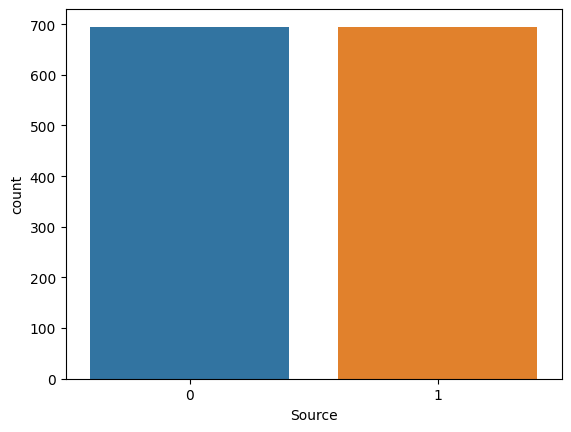

In [61]:
sns.countplot(data=dataset,x='Source')

convert the Content column in all lower case words

In [62]:
##Convert 'Content' column to lowercase
dataset_final['L_Content'] = dataset_final['Content'].str.lower()
dataset_final.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\1164475232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['Content'].str.lower()


,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,"the collapse of silicon valley bank, a major f..."
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,"in a shocking turn of events, the mother of th..."
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,"anchorage, alaska (ap) — a recent rescue missi..."
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,washington (ap) -- a former u.s. government em...
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,the ram truck brand has been a dominant force ...


remove stpwords and punctuation from the content of our news combination

In [63]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuations=string.punctuation
dataset_final['L_Content'] = dataset_final.L_Content.apply(lambda x: ' '.join([word for word in x.split() 
                    if word not in (stop) and word[0] != '@' 
                    and word not in punctuations ]))
dataset_final.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\183012934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final.L_Content.apply(lambda x: ' '.join([word for word in x.split()


,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,"collapse silicon valley bank, major financial ..."
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,"shocking turn events, mother young boy shot te..."
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,"anchorage, alaska (ap) — recent rescue mission..."
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,washington (ap) -- former u.s. government empl...
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,ram truck brand dominant force american pickup...


remove punctuations

In [64]:
dataset_final['L_Content'] = dataset_final['L_Content'].str.replace('[{}]'.format(string.punctuation), '')
dataset_final.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\2819100359.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_final['L_Content'] = dataset_final['L_Content'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\2819100359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].str.replace('[{}]'.format(string.punctuation), '')


,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,collapse silicon valley bank major financial i...
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,shocking turn events mother young boy shot tea...
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,anchorage alaska ap — recent rescue mission al...
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,washington ap former us government employee a...
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,ram truck brand dominant force american pickup...


tokenize the news content

In [65]:
# Load the NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenizing and Stemming

In [66]:
from nltk.stem import PorterStemmer
# Create an instance of the PorterStemmer class
porter_stemmer = PorterStemmer()
# Replace null values with an empty string
dataset_final['L_Content'].fillna('', inplace=True)
# Tokenize the 'Content' column only for non-null values
dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)


C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\565116871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'].fillna('', inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\565116871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)


In [67]:
# Define a function for stemming
def stem_words(tokens):
    return [porter_stemmer.stem(token) for token in tokens]

# Apply stemming to the 'Content' column
dataset_final['L_Content'] = dataset_final['L_Content'].apply(stem_words)

C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\1520122374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].apply(stem_words)


In [68]:
dataset_final

,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,"[collaps, silicon, valley, bank, major, financ..."
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,"[shock, turn, event, mother, young, boy, shot,..."
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,"[anchorag, alaska, ap, —, recent, rescu, missi..."
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,"[washington, ap, former, us, govern, employe, ..."
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,"[ram, truck, brand, domin, forc, american, pic..."
...,...,...,...,...
1384,"AOC, other pro-choicers want to ignore court r...","Alexandria Ocasio-Cortez, a heroine on the Lef...",0,"[alexandria, ocasiocortez, heroin, left, like,..."
1385,IMF trims global growth outlook as banking tur...,The International Monetary Fund on Tuesday cut...,0,"[intern, monetari, fund, tuesday, cut, global,..."
1386,Drake Bell is 'safe' after former Nickelodeon ...,"Former Nickelodeon actor Drake Bell, is no lon...",0,"[former, nickelodeon, actor, drake, bell, long..."
1387,Mark Wahlberg’s daughter hilariously impersona...,Mark Wahlberg isn’t the only member of his fam...,0,"[mark, wahlberg, isn, ’, t, member, famili, kn..."


## Naive Bayes Classification

#### Create a matrix with every unique word in it

In [69]:
# Concatenate the list of words into a single string
dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
# Convert the 'Content' column to lowercase
dataset_final['L_Content'] = dataset_final['L_Content'].str.lower()

C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\2929424380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
C:\Users\Owner\AppData\Local\Temp\ipykernel_22128\2929424380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].str.lower()


In [70]:
cv = CountVectorizer(ngram_range=(1,1), min_df=10)
vectorized_tweets = cv.fit_transform(dataset_final['L_Content'])

In [71]:
# Split data into test and training dataset
X=vectorized_tweets
y=dataset_final['Source'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing
Gaussian NB: When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution
Multinominal NB: Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification

In [72]:
# Fit data to a multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#display(y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print(p, r, f, s)

[0.9109589  0.92424242] [0.93006993 0.9037037 ] [0.92041522 0.91385768] [143 135]


#### Classification Report

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       143
           1       0.92      0.90      0.91       135

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



### Accuracy claculation

In [74]:
# Training set accuracy
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 0.9469
Model accuracy score: 0.9173


### Check for overfitting and underfitting

In [75]:
#print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9469
Test set score: 0.9173


Text(77.92222222222227, 0.5, 'Predicted')

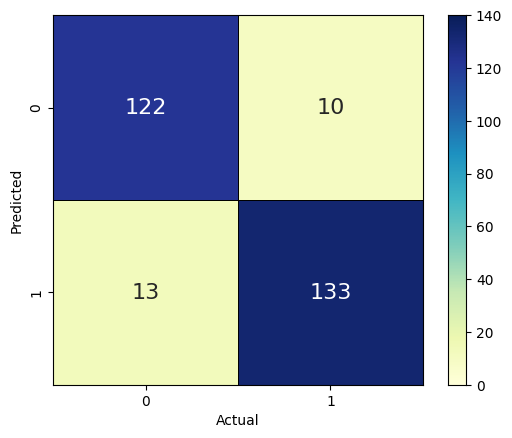

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
array = [[tp, fp],[fn, tn]]
sns.heatmap(array, annot=True, annot_kws={"size": 16}, fmt='d', cmap='YlGnBu', vmin=0, vmax=140, cbar=True, linewidths=0.5, linecolor='k', square=True)
sns.despine(left=False, right=False, top=False, bottom=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# plt.savefig('1x1.png')

In [77]:
orig_article_sorted = clf.feature_log_prob_[0, :].argsort()[::-1]
ai_article_sorted = clf.feature_log_prob_[1, :].argsort()[::-1]
print('Orig article words:\n', np.take(cv.get_feature_names_out(), orig_article_sorted[:50]))
print('\nFake article words:\n', np.take(cv.get_feature_names_out(), ai_article_sorted[:50]))

Orig article words:
 ['said' 'year' 'peopl' 'also' 'one' 'state' 'new' 'say' 'it' 'report'
 'accord' 'time' 'would' 'like' 'get' 'use' 'news' 'two' 'first' 'includ'
 'last' 'us' 'day' 'make' 'told' 'the' 'polic' 'nation' 'could' 'offic'
 'call' 'go' 'work' 'bank' 'fox' 'offici' 'health' 'may' 'show' 'we'
 'week' 'thursday' 'govern' 'month' 'famili' 'compani' 'countri' 'case'
 'wednesday' 'still']

Fake article words:
 ['also' 'said' 'year' 'mani' 'state' 'one' 'new' 'need' 'work' 'could'
 'howev' 'use' 'peopl' 'continu' 'countri' 'includ' 'like' 'recent'
 'commun' 'us' 'may' 'health' 'make' 'take' 'time' 'come' 'issu' 'provid'
 'concern' 'compani' 'govern' 'support' 'face' 'would' 'world' 'right'
 'import' 'call' 'it' 'we' 'help' 'signific' 'risk' 'sever' 'critic'
 'protect' 'say' 'bank' 'potenti' 'remain']
